# Climate Modelling

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as op
from zero_dimension_model import ZeroClimateModel
from helper_functions import format_plot, basic_solve
from multiprocessing import Pool

## Exercise 1

solutions are {236.65, 286.11, 287.23}


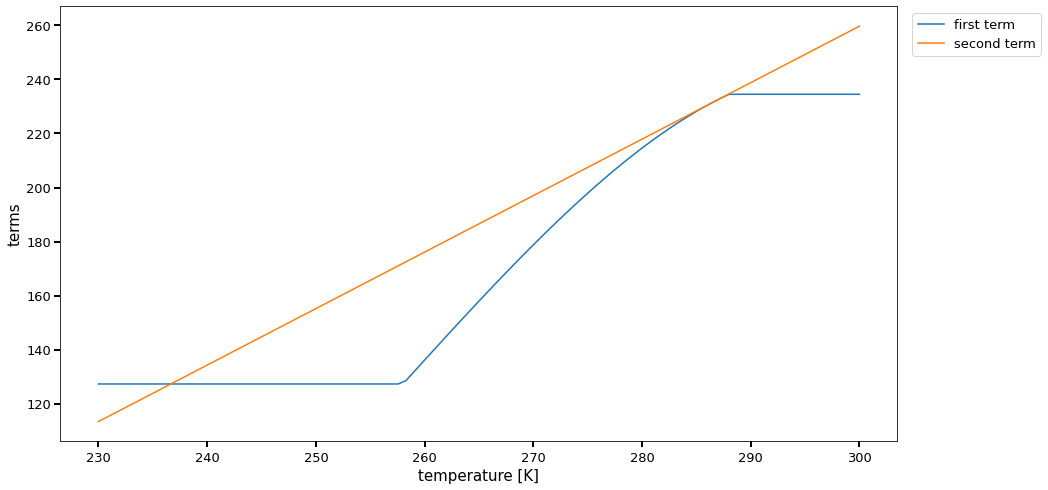

In [23]:
model = ZeroClimateModel()

temperature_earth = np.linspace(230, 300, 100)
first_term = model.first_term(temperature_earth)
second_term = model.second_term(temperature_earth)

fig, ax = plt.subplots(figsize=(15,8))

ax.plot(temperature_earth, first_term, label='first term')
ax.plot(temperature_earth, second_term, label='second term')

ax = format_plot(ax, x_label='temperature [K]', y_label='terms')
ax.plot()

solutions = basic_solve(model.step, 230,300, decimals=2)
print(f"solutions are {solutions}")

## Exercise 2

In [ ]:
def simulate(temperature):
    sim_model = ZeroClimateModel()
    time = 0
    time_step = 86400
    steps = 10000

    times = []
    temps = []
    for i in range(steps):
        times.append(time)
        temps.append(temperature)

        temp_derivative = sim_model.step(temperature)
        temperature += temp_derivative * time_step
        time += time_step
    return times, temps

In [4]:
starting_temps = [230, 240, 250, 260, 270, 280, 290, 300]
dict_times = {}
dict_temps = {}
for temp in starting_temps:
    data_time, data_temp = simulate(temp)
    dict_times[temp] = data_time
    dict_temps[temp] = data_temp

[]

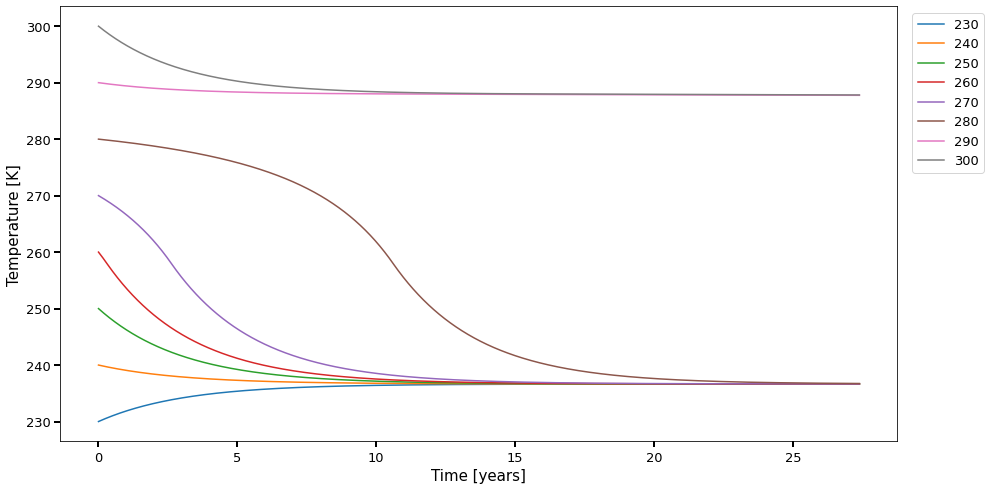

In [12]:
fig, ax = plt.subplots(figsize=(15,8))
for temp in dict_times:
    ax.plot(np.array(dict_times[temp])/(24*60*60*365), dict_temps[temp], label = temp)
    ax = format_plot(ax, x_label='Time [years]', y_label='Temperature [K]')

ax.plot()

## Exercise 3

varying the solar constant

S_0 = 1139.0, T = {227.5, 284.2, 284.3, 284.4, 284.0, 284.1, 284.5}
S_0 = 1220.888888888889, T = {285.5, 285.3, 285.4, 231.2}
S_0 = 1302.7777777777778, T = {235.0, 286.4, 286.3, 286.2}
S_0 = 1384.6666666666665, T = {291.7, 276.9, 238.7}
S_0 = 1466.5555555555554, T = {242.4, 298.5, 270.6}
S_0 = 1548.4444444444443, T = {305.4, 266.4, 246.1}
S_0 = 1630.3333333333333, T = {312.3, 249.8, 263.2}
S_0 = 1712.2222222222222, T = {260.6, 253.6, 319.1}
S_0 = 1794.111111111111, T = {257.3, 258.4, 326.0}
S_0 = 1875.9999999999998, T = {258.0, 332.8}


[]

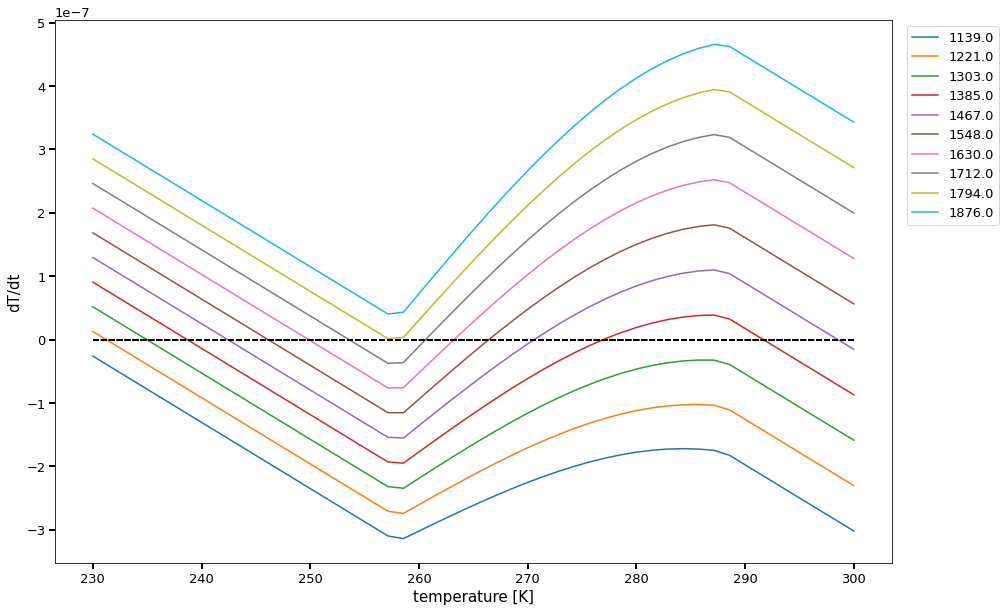

In [21]:
model = ZeroClimateModel()
solutions_dict = {}
current_solar_constant = model.S0
solar_constants = [current_solar_constant * x for x in np.linspace(0.85, 1.4, 10)]


fig, ax = plt.subplots(figsize = [15,10])

for solar_constant in solar_constants:
    model.S0 = solar_constant
    f = model.step
    solutions = basic_solve(f, 200, 300)
    solutions_dict[solar_constant] = solutions
    print(f'S_0 = {solar_constant}, T = {solutions}')
    
    # Plotting
    x = np.linspace(230,300)
    y = f(x)
    ax.plot(x, y, label=round(solar_constant))
    ax.plot(x, np.zeros_like(x), '--', color='k')

ax = format_plot(ax, x_label='temperature [K]', y_label='dT/dt')
ax.plot()

In [25]:
model = ZeroClimateModel()
solutions = basic_solve(model.step, 230,300, decimals=2)
ice_covered_solution = list(solutions)[0]
print(f"ice covered earth at T: {ice_covered_solution}")

ice covered earth at T: 236.65
